# Numerical Optimization (CS215300) Assignment 1
## Introduction
In this assignment, we expect you to be familiar with optimization library, the numerical calculation package 'SciPy'. We are using the Rosenbrock function as the benchmark of our optimization algorithms. Rosenbrock is a simple fourth-order function has the minimal point at [1,1]. We provide a visualization function which draws the contour.
## Task
1. Please finish the TODO part, which you're going to read the document of SciPy and learn how to minimize function.
    You may refer the information in the following link:
    https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
2. Please apply SciPy library of the optimization algorithm of BFGS, Conjugate gradient, Modified Newton's method with conjugate gradient with the initilal guess [-2,2].
3. Gradient descent is not included in SciPy package, please implement "Gradient descent with optimal step length".
    Please refer page 11 of handout 2. 
4. Newton's method is not included in SciPy package, please implement "Pure Newton's method".
    Please refer page 18 of handout 2.
5. Write a concise report about:
    * Comparing the behavior of these algorithms, include the visualized plot, number of iterarions, step length etc.
    * How do you implement the Gradient descent and Newton's method algorithm 
    * Note: Write your report in the LAST cell of this notebook in Markdown Style. If you are new to Markdown, please check this tutorial link: https://www.markdowntutorial.com/ / Markdown syntax: https://www.markdownguide.org/basic-syntax/
6. Rename this notebook file with your student ID and upload it to eeclass platform. (ex. 107xxxxxx.ipynb)
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import packages and visualization
If you imported extra packages, please mention in your report.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [ ]:
def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2,2,1000)
    y = np.linspace(-1,3,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

## BFGS

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42
[1.00000021 1.00000045]


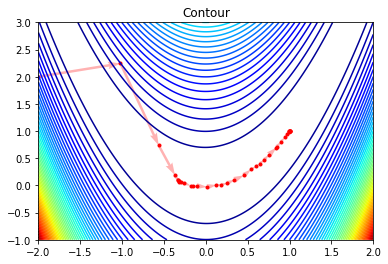

In [ ]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
def callback(xi):
  x_iter.append(xi)

res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True}, callback=callback)
print(res.x)
x_iter.insert(0,x0)
visualize(x_iter)

## Conjugate Gradient

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 79
         Gradient evaluations: 79
[0.99999998 0.99999995]


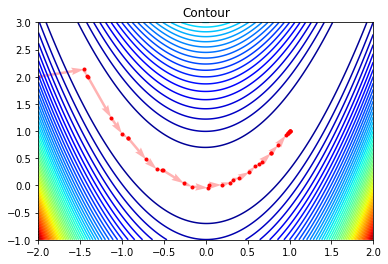

In [ ]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
def callback(xi):
  x_iter.append(xi)

res = minimize(rosen, x0, method='CG', jac=rosen_der,
               options={'disp': True}, callback=callback)
print(res.x)

x_iter.insert(0,x0)
visualize(x_iter)

## Gradient Descent with optimal step length

In [ ]:
## TEST
from scipy.optimize import fmin
def func_2(t, a):
   x,y=t
   return ((x-a)*(x-a)) + ((y-a) *(y-a))
print(fmin(func_2,np.array([1,1]),args=(3,)))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 70
[3.00004235 2.99999815]


In [ ]:
from scipy.optimize import fmin

def F(alpha_k, x_k, grad):
  # grad = Grad(x_k)
  return rosen(x_k - alpha_k * grad)

def Find_Step_Length(F, x_k, grad):
  # res = _minimize_neldermead(F, 1., args=(F(alpha_k,*args)))
  return fmin(F, np.array([1.]), args=(x_k, grad), disp=0)

x_0 = np.array([-2, 2])
print(Find_Step_Length(F, x_0, rosen_der(x_0)))

[0.00033722]


In [ ]:
x_0 = np.array([-2, 2])
x_k = x_0
a = 0
for _ in range(10):
  a = Find_Step_Length(F, x_k, rosen_der(x_k))
  x_k = x_k - a * rosen_der(x_k)
  print(a, x_k)
# print(a, x_k)

[0.00033722] [-1.4584259  2.1348877] [-0.00010756  0.00053156]
[0.03056641] [-1.44867608  2.08670538] [-0.36148103 -0.07309659]
[0.26171875] [1.64643304 2.71258036] [0.02146491 0.09623907]
[0.07294922] [1.6404501  2.68575552] [ 0.34814592 -0.07763274]
[0.73339844] [-1.8596515   3.46623991] [0.13504248 1.16408111]
[0.00244141] [-1.86010104  3.46236481] [-0.00962585  0.00116647]
[0.91289062] [1.73919571 3.02619976] [0.46174032 0.25525286]
[0.00078125] [1.73880055 3.02598132] [-0.00023338  0.00039906]
[0.00068359] [1.73900476 3.02563214] [0.00029967 0.00020434]
[0.00097656] [1.73857666 3.02534023] [-0.00038529  0.00052567]


In [ ]:
def Gradient_Descent(Grad, x, epsilon=0.00001, nMax = 10000 ):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments:
        # x_iter: a list which contains new x for each step of iteration
        # step_length: a list which contains the optimal step length for each step of iteration
        # iter_count: an integer, the number of iteration the algorithm taken to convergence
    f_min = rosen(x)
    x_iter = [x]
    step_length = []
    iter_count = 0
    x_k = x
    alpha_k = 1
    for i in range(nMax):
      alpha_k = Find_Step_Length(F, x_k, Grad(x_k))
      alpha_k = np.clip(alpha_k, 0, 1)
      x_next = x_k - alpha_k * Grad(x_k)
      step_length.append(alpha_k)
      x_iter.append(x_next)

      if f_min > rosen(x_k):
        f_min = rosen(x_k)

      if (np.sum(np.abs((rosen(x_next) - f_min)))) < epsilon:
        iter_count = i+1
        break
      x_k = x_next

    return x_iter, iter_count, step_length

Iteration Count: 6648



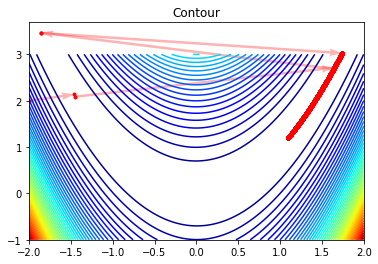

In [ ]:
x0 = np.array([-2,2])
x_iter, iter_count, step_length = Gradient_Descent(rosen_der,x0)
print('Iteration Count: %d\n' % iter_count)
visualize(x_iter)

## Pure Newton's Method

In [ ]:
def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 10000 ):
    # TODO
    # Input arguments:
        # Grad: the derivative of the objective function
        # Grad2: the second derivative of the objective function
        # x: initial guess
        # epsilon: the tolerence of error during optimization, if error is less than epsilon we consider it as convergence
        # nMax: maxinum number of iteration, you can manually modify this constatnt if the default value is not enough
    # Output arguments: (same as above)
    # Hint: Use numpy.linalg to compute the inverse of a matrix

    f_min = rosen(x)
    x_iter = [x]
    step_length = []
    iter_count = 0
    x_k = x

    for i in range(nMax):
      x_next = x_k - np.dot(np.linalg.inv(Grad2(x_k)), Grad(x_k))
      step_length.append(np.dot(np.linalg.inv(Grad2(x_k)), Grad(x_k)))
      x_iter.append(x_next)

      if f_min > rosen(x_k):
        f_min = rosen(x_k)

      if (np.sum(np.abs((rosen(x_next) - f_min)))) < epsilon:
        iter_count = i+1
        break
      x_k = x_next    

    return x_iter, iter_count, step_length

Iteration Count: 6



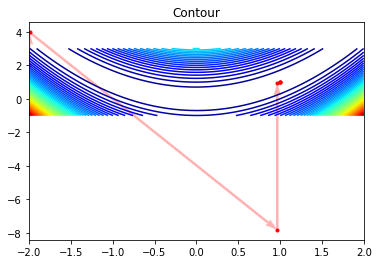

In [ ]:
x0 = np.array([-2,2])
x_iter, iter_count, step_length = Newton(rosen_der,rosen_hess,x0)
print('Iteration Count: %d\n' % iter_count)
visualize(x_iter)

## Modified Newton's method with conjugate gradiet (Newton-CG)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 277
         Function evaluations: 298
         Gradient evaluations: 574
         Hessian evaluations: 277
[1. 1.]


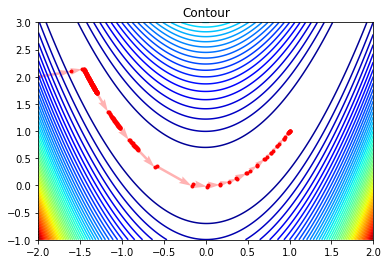

In [ ]:
x0 = np.array([-2,2])
x_iter = list()
## TODO (HINT:You will need to feed in rosen_hess in this optimize function)
def callback(xi):
  x_iter.append(xi)

res = minimize(rosen, x0, method='Newton-CG',
         jac=rosen_der, hess=rosen_hess,
         options={'xtol': 1e-8, 'disp': True}, callback=callback)
print(res.x)

x_iter.insert(0,x0)
visualize(x_iter)

## Report

In [ ]:
## Type your report here.